# Markovitz Efficient Portfolio

In the notebook, we present the frame of the markowitz approach and we solve it. In this approach, the performance of a portfolio will be measured by the mean of its return and its risk by its variance. 

## Building the portfolio

We assume a market $N$ assets and with two dates : $t=0$ and $t=1$ where $t=0$ corresponds to the initial investment and $t=1$ its horizon. We denote $a = (a_1, ..., a_N)^T$ the number of each unit of our portfolio. We denote $p_{i,t} the price of the asset $i$ at time $t$ and $r$ its return between $t=0$ and $t=1$. We also asusme there is a risk-free asset (RFA) with risk-free rate $r$. The number of units in this risk-free asset will be denoted $a_0$

We denote  $Y = (y_1,..., y_N)^T$ corresponds to the return vector. We denote the expected return and its variance by :
 $$\mu = \mathbb{E}[Y] = a_0(1+r)$$
  $$\Omega = Var(Y) = a^T diag(p_0) \Omega diag(p_0)a$$

The value or our portfolio $V_t$ then verify : 
$$V_t = a_0 p_t^{RFA} + a^T p_t$$

then : $$V_0 = a_0 + a^T p_0 = v$$
$$V_1 = a_0(1+r) + \sum_{i=1}^{N} a_i p_{i,0}y_i = a_0(1+r)+ a^Tdiag(p_0)Y$$

We then, in the Markowits framework, want to maximize the expected value $\mathbb{E}[V]$ of the portfolio with respect to a certain constraint in the variance $Var(V) = \sigma^2$. 

We the search the portfolio that verify the following optimization problem (classical Markovitz optimization problem): 

$$\max_{a_0, a} \mathbb{E}[V_1] = \max_{a_0, a} \left( a_0(1 + r) + a^T \text{diag}(p_0) \mu \right)$$

with respect to (w.r.t) the constraints:

$$a^T \text{diag}(p_0) \Omega \text{diag}(p_0) a = \sigma^2, \quad \text{and} \quad a_0 + a^T p_0 = v$$
We call efficient frontier all the portfolio that verify those contraints. 

Now let's work on those equations to rewrite them in a way we can resolve it. Lets denote $w_a = diag(p_0)a$, the composition vector of our portfolio iun risky asset. We then have the relations : $v = a_0 + w_{a}^{T} e, e = (1,..., 1)^T$. So we have : 

$$\max_{w_a} (v-w_a^T e)(1+r) + w_a^T \mu $$
$$ \text{st : }w_a^T \Omega w_a$$

Denote $\tilde{\mu} = \mu - (1+r)e$. To solve this optimzation problem, we search the stationnary points of the following Lagrangin $\alpha (w_a, \lambda)$ function :

$$\alpha(w_a, \lambda) = w_a^T \tilde{\mu} - \frac{\lambda}{2} (w_a^T \Omega w_a - \sigma^2)$$
$$= \sum_{i=1}^{N} w_{a, i} \tilde{\mu}_i - \frac{\lambda}{2} \left(\sum_{i=1}^{N} w_{a, i}^2 \Omega_{i,i} + \sum_{i \not= j} w_{a, i} w_{a, j} \Omega_{i,j} - \sigma^2 \right)$$

The first order conditions are : 


$$\quad \frac{\partial\mathcal{\alpha}}{\partial w_{a,i}} = \tilde{\mu_i} - \lambda \left( w_{a,i} \Omega_{i,i} + \sum_{j\not= i} w_{a,j}\Omega_{i,j} \right) = 0 $$

$$\frac{\partial\mathcal{\alpha}}{\partial \lambda} = -\frac{1}{2} \left( w_a^T \Omega w_a- \sigma^2 \right) = 0 $$

Hence 
$$\tilde{\mu} - \lambda \Omega w_a = 0 \quad \text{and} \quad w_a^T \Omega w_a = \sigma^2$$

We now can retrive the parameters $a_0, a, \lambda$ : 


$$a = \frac{1}{\lambda} diag(p_0)^{-1} \Omega^{-1} \tilde{\mu}$$

$$a_0 = v - \frac{1}{\lambda} \tilde{\mu}^T \Omega^{-1}e$$

$$\lambda = \frac{1}{\sigma} \left( \tilde{\mu}^T \Omega^{-1} \tilde{\mu} \right)^{\frac{1}{2}}$$



In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
CAC40 = pd.read_csv('preprocessed_CAC40.csv')
CAC40 = CAC40[['Date', 'Name', 'Closing_Price']]
CAC40.head()

CAC40 = CAC40.pivot(index='Date', columns='Name', values='Closing_Price').reset_index()
CAC40 = CAC40.fillna(0)
CAC40.head()

Name,Date,AXA,Accor,Air Liquide,Airbus,ArcelorMittal,Atos,BNP Paribas,Bouygues,Cap Gemini,...,Sanofi,Schneider Electric,Société Générale (Societe Generale,Sodexo,TOTAL,Unibail-Rodamco,VINCI,Veolia Environnement,Vivendi,Worldline SA
0,2010-01-04,16.88,24.92,52.27,14.02,72.71,22.53,57.30,34.82,33.03,...,56.90,40.91,45.60,39.09,36.32,152.00,39.70,22.24,21.34,0.0
1,2010-01-05,17.14,24.82,51.86,13.92,72.62,23.11,57.37,35.21,33.51,...,55.96,41.12,45.54,39.51,36.35,153.95,40.26,22.36,21.34,0.0
2,2010-01-06,17.29,24.66,51.34,14.07,72.64,24.04,57.45,35.83,34.34,...,55.55,40.72,45.54,41.89,36.38,154.15,40.55,22.74,21.22,0.0
3,2010-01-07,17.09,24.27,51.34,14.24,73.28,23.96,58.50,35.92,34.16,...,56.08,40.40,46.59,41.32,36.49,155.20,40.82,23.01,21.17,0.0
4,2010-01-08,17.17,24.43,51.52,14.38,74.24,24.12,59.75,35.71,34.19,...,55.79,40.06,47.72,41.47,36.31,153.85,41.35,24.02,20.80,0.0


In [201]:
CAC40.columns

Index(['Date', 'AXA', 'Accor', 'Air Liquide', 'Airbus ', 'ArcelorMittal',
       'Atos', 'BNP Paribas', 'Bouygues', 'Cap Gemini', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Engie (ex GDF Suez', 'EssilorLuxottica',
       'Hermès (Hermes International', 'Kering', 'LEGRAND', 'LOréal',
       'LVMH Moet Hennessy Louis Vuitton',
       'Michelin (Compagnie Générale d Etablissements Michelin SCPA', 'Orange',
       'Pernod Ricard', 'Peugeot', 'Publicis', 'Renault', 'SAFRAN',
       'STMicroelectronics', 'Saint-Gobain', 'Sanofi', 'Schneider Electric',
       'Société Générale (Societe Generale', 'Sodexo', 'TOTAL',
       'Unibail-Rodamco', 'VINCI', 'Veolia Environnement', 'Vivendi',
       'Worldline SA'],
      dtype='object', name='Name')

- Example of one asset of the CAC40 : Total

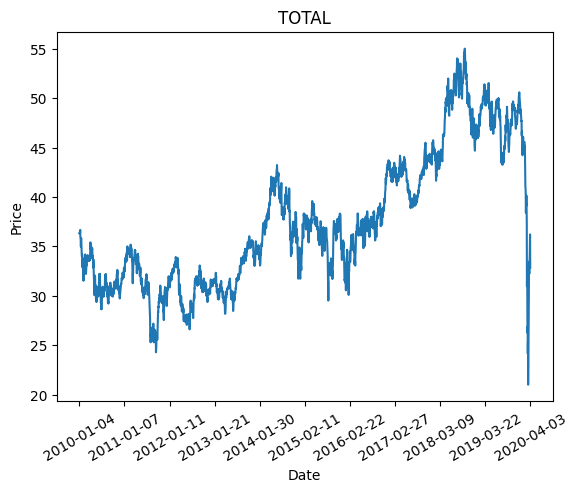

In [202]:
price = CAC40['TOTAL'].to_numpy()
dates = CAC40['Date'].to_numpy()

plt.plot(dates, price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TOTAL')
step = len(price) //  10
dates_to_display = dates[::step]
plt.xticks(dates_to_display, rotation=30) 
plt.show()

- The 40 assets of the CAC40 :

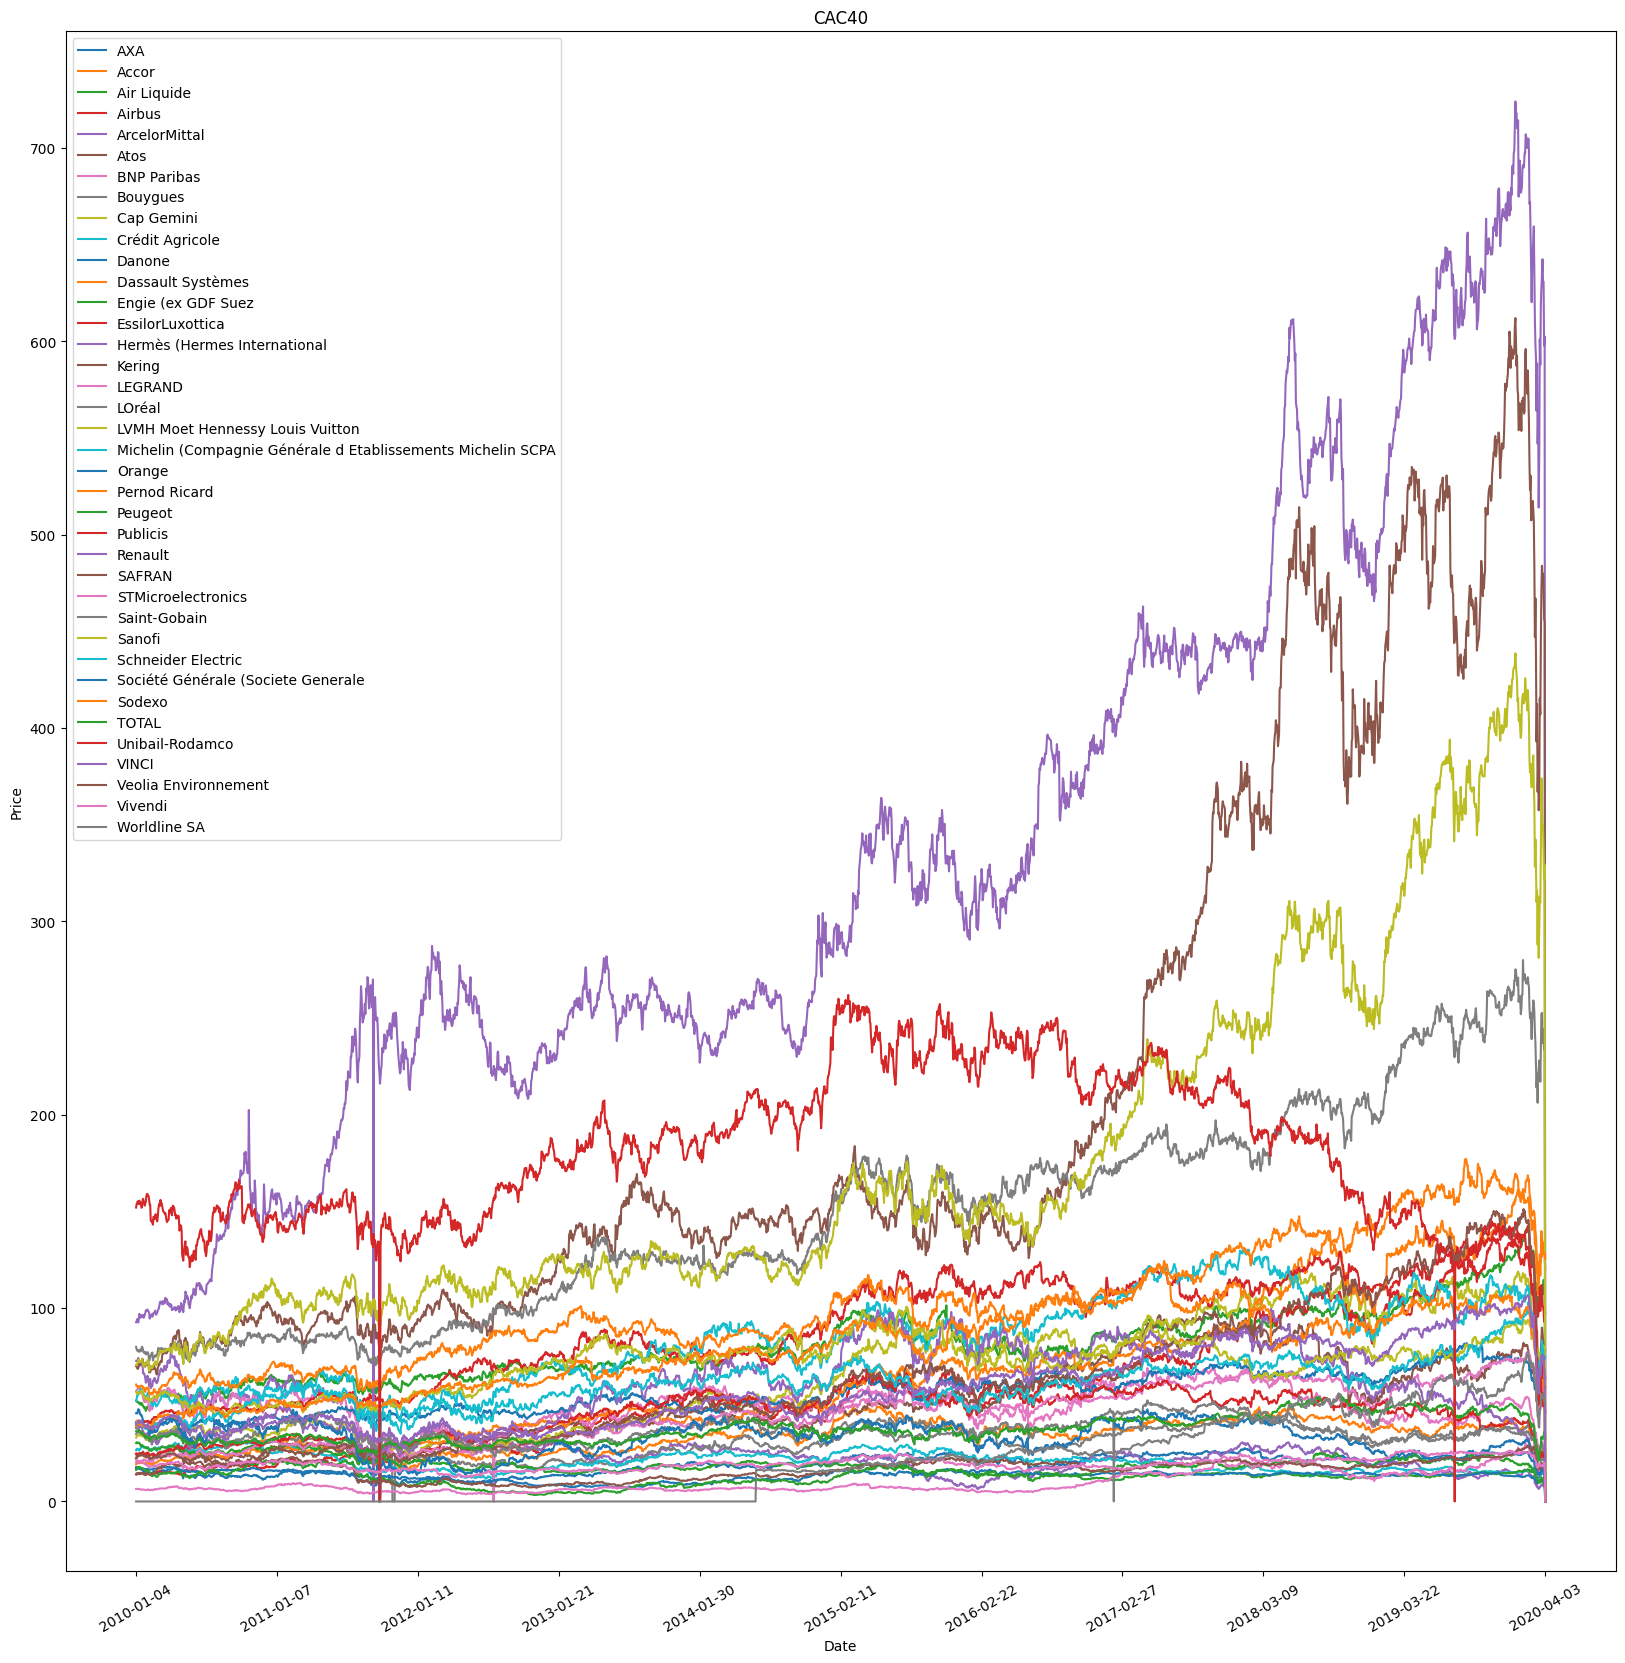

In [203]:
plt.figure(figsize=(20, 20))
dates = CAC40['Date'].to_numpy()

for company in CAC40.columns[1:]: 
    price = CAC40[company].to_numpy()
    plt.plot(dates, price, label = company)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('CAC40')
step = len(price) //  10
dates_to_display = dates[::step]
plt.xticks(dates_to_display, rotation=30) 
plt.show()

# Returns Estimation

## Daily Returns

In [204]:
start_date = "2015-01-01"
end_date = "2015-12-31"

CAC40_year = CAC40[(CAC40.Date >= start_date) & (CAC40.Date <= end_date)].reset_index(drop = True)

CAC40_daily_return = CAC40_year.iloc[:,1:].pct_change() + 1
CAC40_daily_return = CAC40_daily_return.drop(0).reset_index(drop=True, inplace=False)

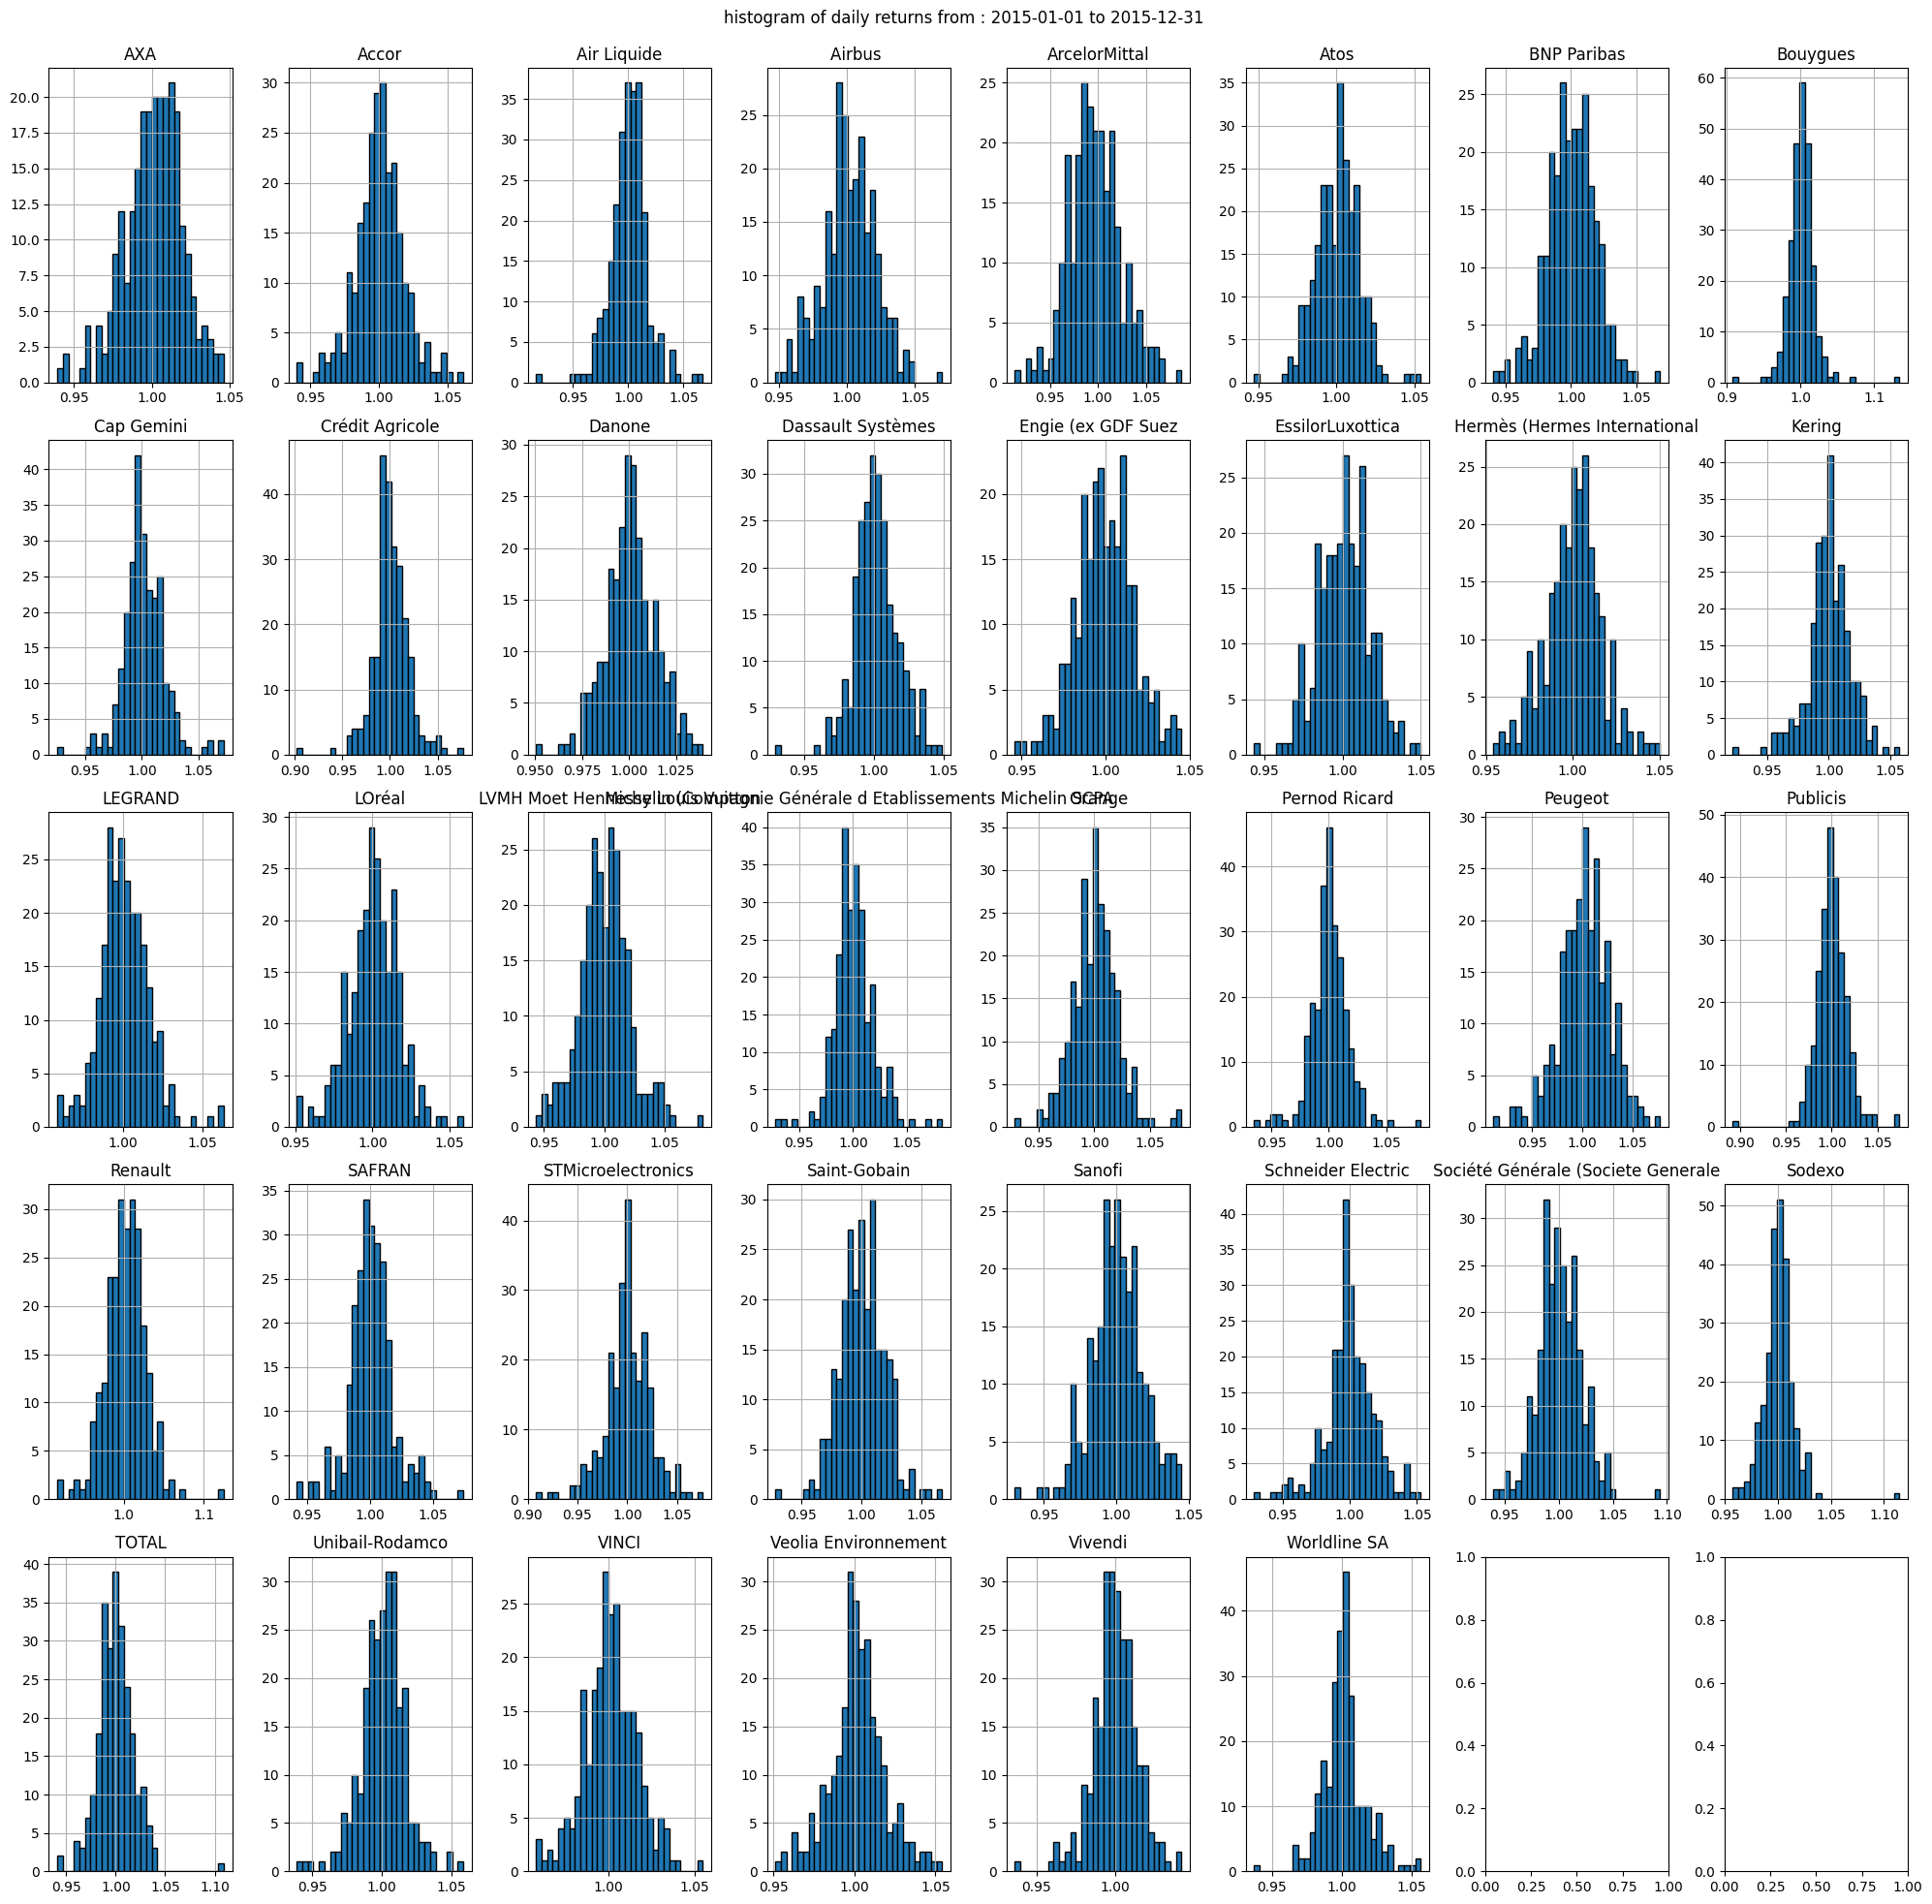

In [205]:

fig, axs = plt.subplots(5, 8, figsize=(20, 20))

for i, asset in enumerate(CAC40_daily_return.columns):
    row = i // 8  
    col = i % 8   
    axs[row, col].hist(CAC40_daily_return[asset].dropna(), bins=30, edgecolor='black')
    axs[row, col].set_title(f'{asset}')
    axs[row, col].grid(True)

plt.tight_layout()

plt.suptitle('histogram of daily returns from : ' + start_date + ' to ' + end_date)
plt.subplots_adjust(top=0.95)

plt.show()


In [206]:
mean_returns = CAC40_daily_return.mean()
var_returns = CAC40_daily_return.var()

stats_rendements = pd.DataFrame({'Mean': mean_returns, 'Variance': var_returns}).T

stats_rendements

Name,AXA,Accor,Air Liquide,Airbus,ArcelorMittal,Atos,BNP Paribas,Bouygues,Cap Gemini,Crédit Agricole,...,Sanofi,Schneider Electric,Société Générale (Societe Generale,Sodexo,TOTAL,Unibail-Rodamco,VINCI,Veolia Environnement,Vivendi,Worldline SA
Mean,1.001314,1.000478,1.000274,1.001841,0.997117,1.000823,1.00044,1.000995,1.001583,1.000538,...,1.000405,0.999715,1.000928,1.000578,1.000335,1.000574,1.001148,1.001779,0.999938,1.001722
Variance,0.000339,0.000333,0.000287,0.000384,0.000761,0.000200,0.00034,0.000345,0.000325,0.000350,...,0.000325,0.000333,0.000401,0.000217,0.000330,0.000259,0.000236,0.000286,0.000196,0.000235


## Monthly return

In [207]:
start_date = "2015-01-01"
end_date = "2020-12-31"

CAC40_year = CAC40[(CAC40.Date >= start_date) & (CAC40.Date <= end_date)].reset_index(drop = True)
CAC40_year.Date = pd.to_datetime(CAC40_year.Date)
CAC40_year = CAC40_year.set_index('Date')
CAC40_monthly_return = CAC40_year.iloc[:,0:].resample('ME').mean().pct_change() + 1

CAC40_monthly_return = CAC40_monthly_return.dropna().reset_index(drop=True, inplace=False)

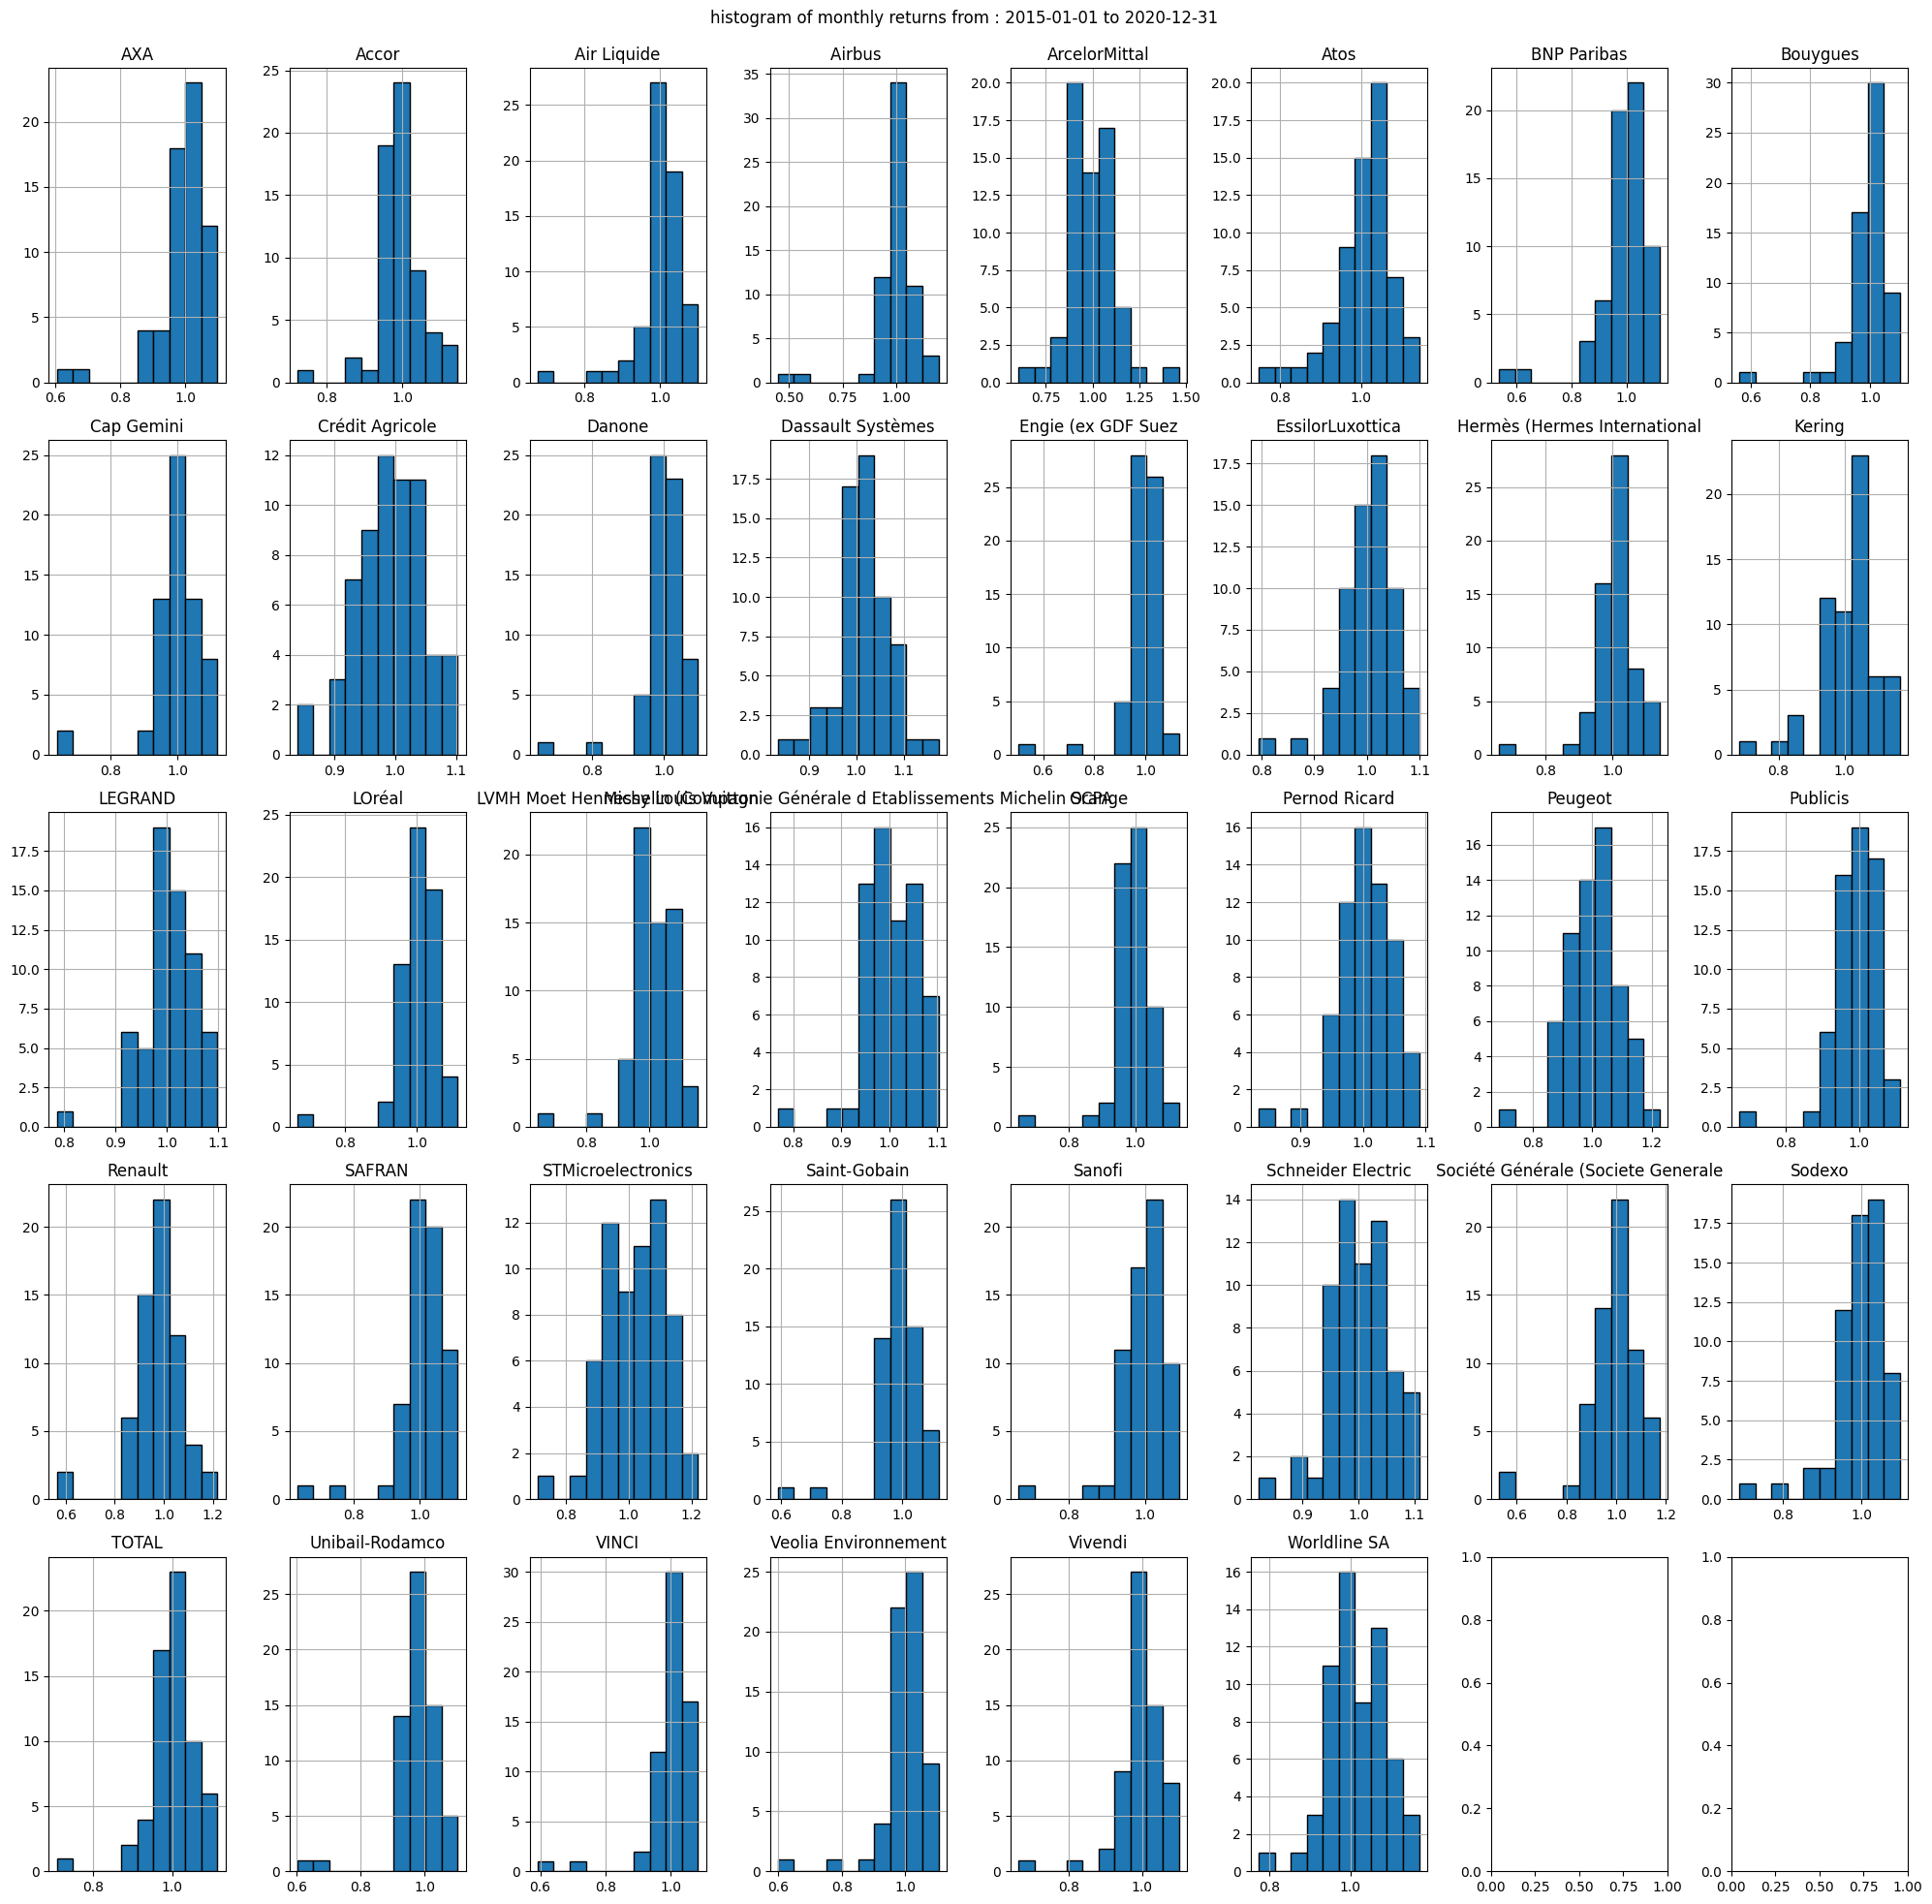

In [208]:
fig, axs = plt.subplots(5, 8, figsize=(20, 20))

for i, column in enumerate(CAC40_monthly_return.columns):
    row = i // 8  
    col = i % 8   
    axs[row, col].hist(CAC40_monthly_return[column].dropna(), bins=10, edgecolor='black')
    axs[row, col].set_title(f'{column}')
    axs[row, col].grid(True)

plt.tight_layout()

plt.suptitle('histogram of monthly returns from : ' + start_date + ' to ' + end_date)
plt.subplots_adjust(top=0.95)

plt.show()


In [209]:
mean_returns = CAC40_monthly_return.mean()
var_returns = CAC40_monthly_return.var()

stats_rendements = pd.DataFrame({'Mean': mean_returns, 'Variance': var_returns}).T

stats_rendements

Name,AXA,Accor,Air Liquide,Airbus,ArcelorMittal,Atos,BNP Paribas,Bouygues,Cap Gemini,Crédit Agricole,...,Sanofi,Schneider Electric,Société Générale (Societe Generale,Sodexo,TOTAL,Unibail-Rodamco,VINCI,Veolia Environnement,Vivendi,Worldline SA
Mean,0.993222,0.994406,1.000414,1.002937,0.993700,1.006505,0.989669,0.993998,1.000233,0.993213,...,0.995877,1.004062,0.987413,0.996575,1.002000,0.979153,1.002075,1.000065,0.995453,1.021151
Variance,0.006808,0.003910,0.003787,0.011323,0.015935,0.004572,0.008802,0.006139,0.006253,0.003101,...,0.003800,0.002909,0.011119,0.004297,0.003451,0.006091,0.005143,0.005479,0.004115,0.004979


## Annual returns : 

In [210]:
start_date = CAC40.Date.min()
end_date = CAC40.Date.max()

CAC40_year = CAC40[(CAC40.Date >= start_date) & (CAC40.Date <= end_date)].reset_index(drop = True)
CAC40_year.Date = pd.to_datetime(CAC40_year.Date)
CAC40_year = CAC40_year.set_index('Date')
CAC40_yearly_return = CAC40_year.iloc[:,0:].resample('YE').mean().pct_change() + 1


CAC40_yearly_return = CAC40_yearly_return.dropna().reset_index(drop=True, inplace=False)


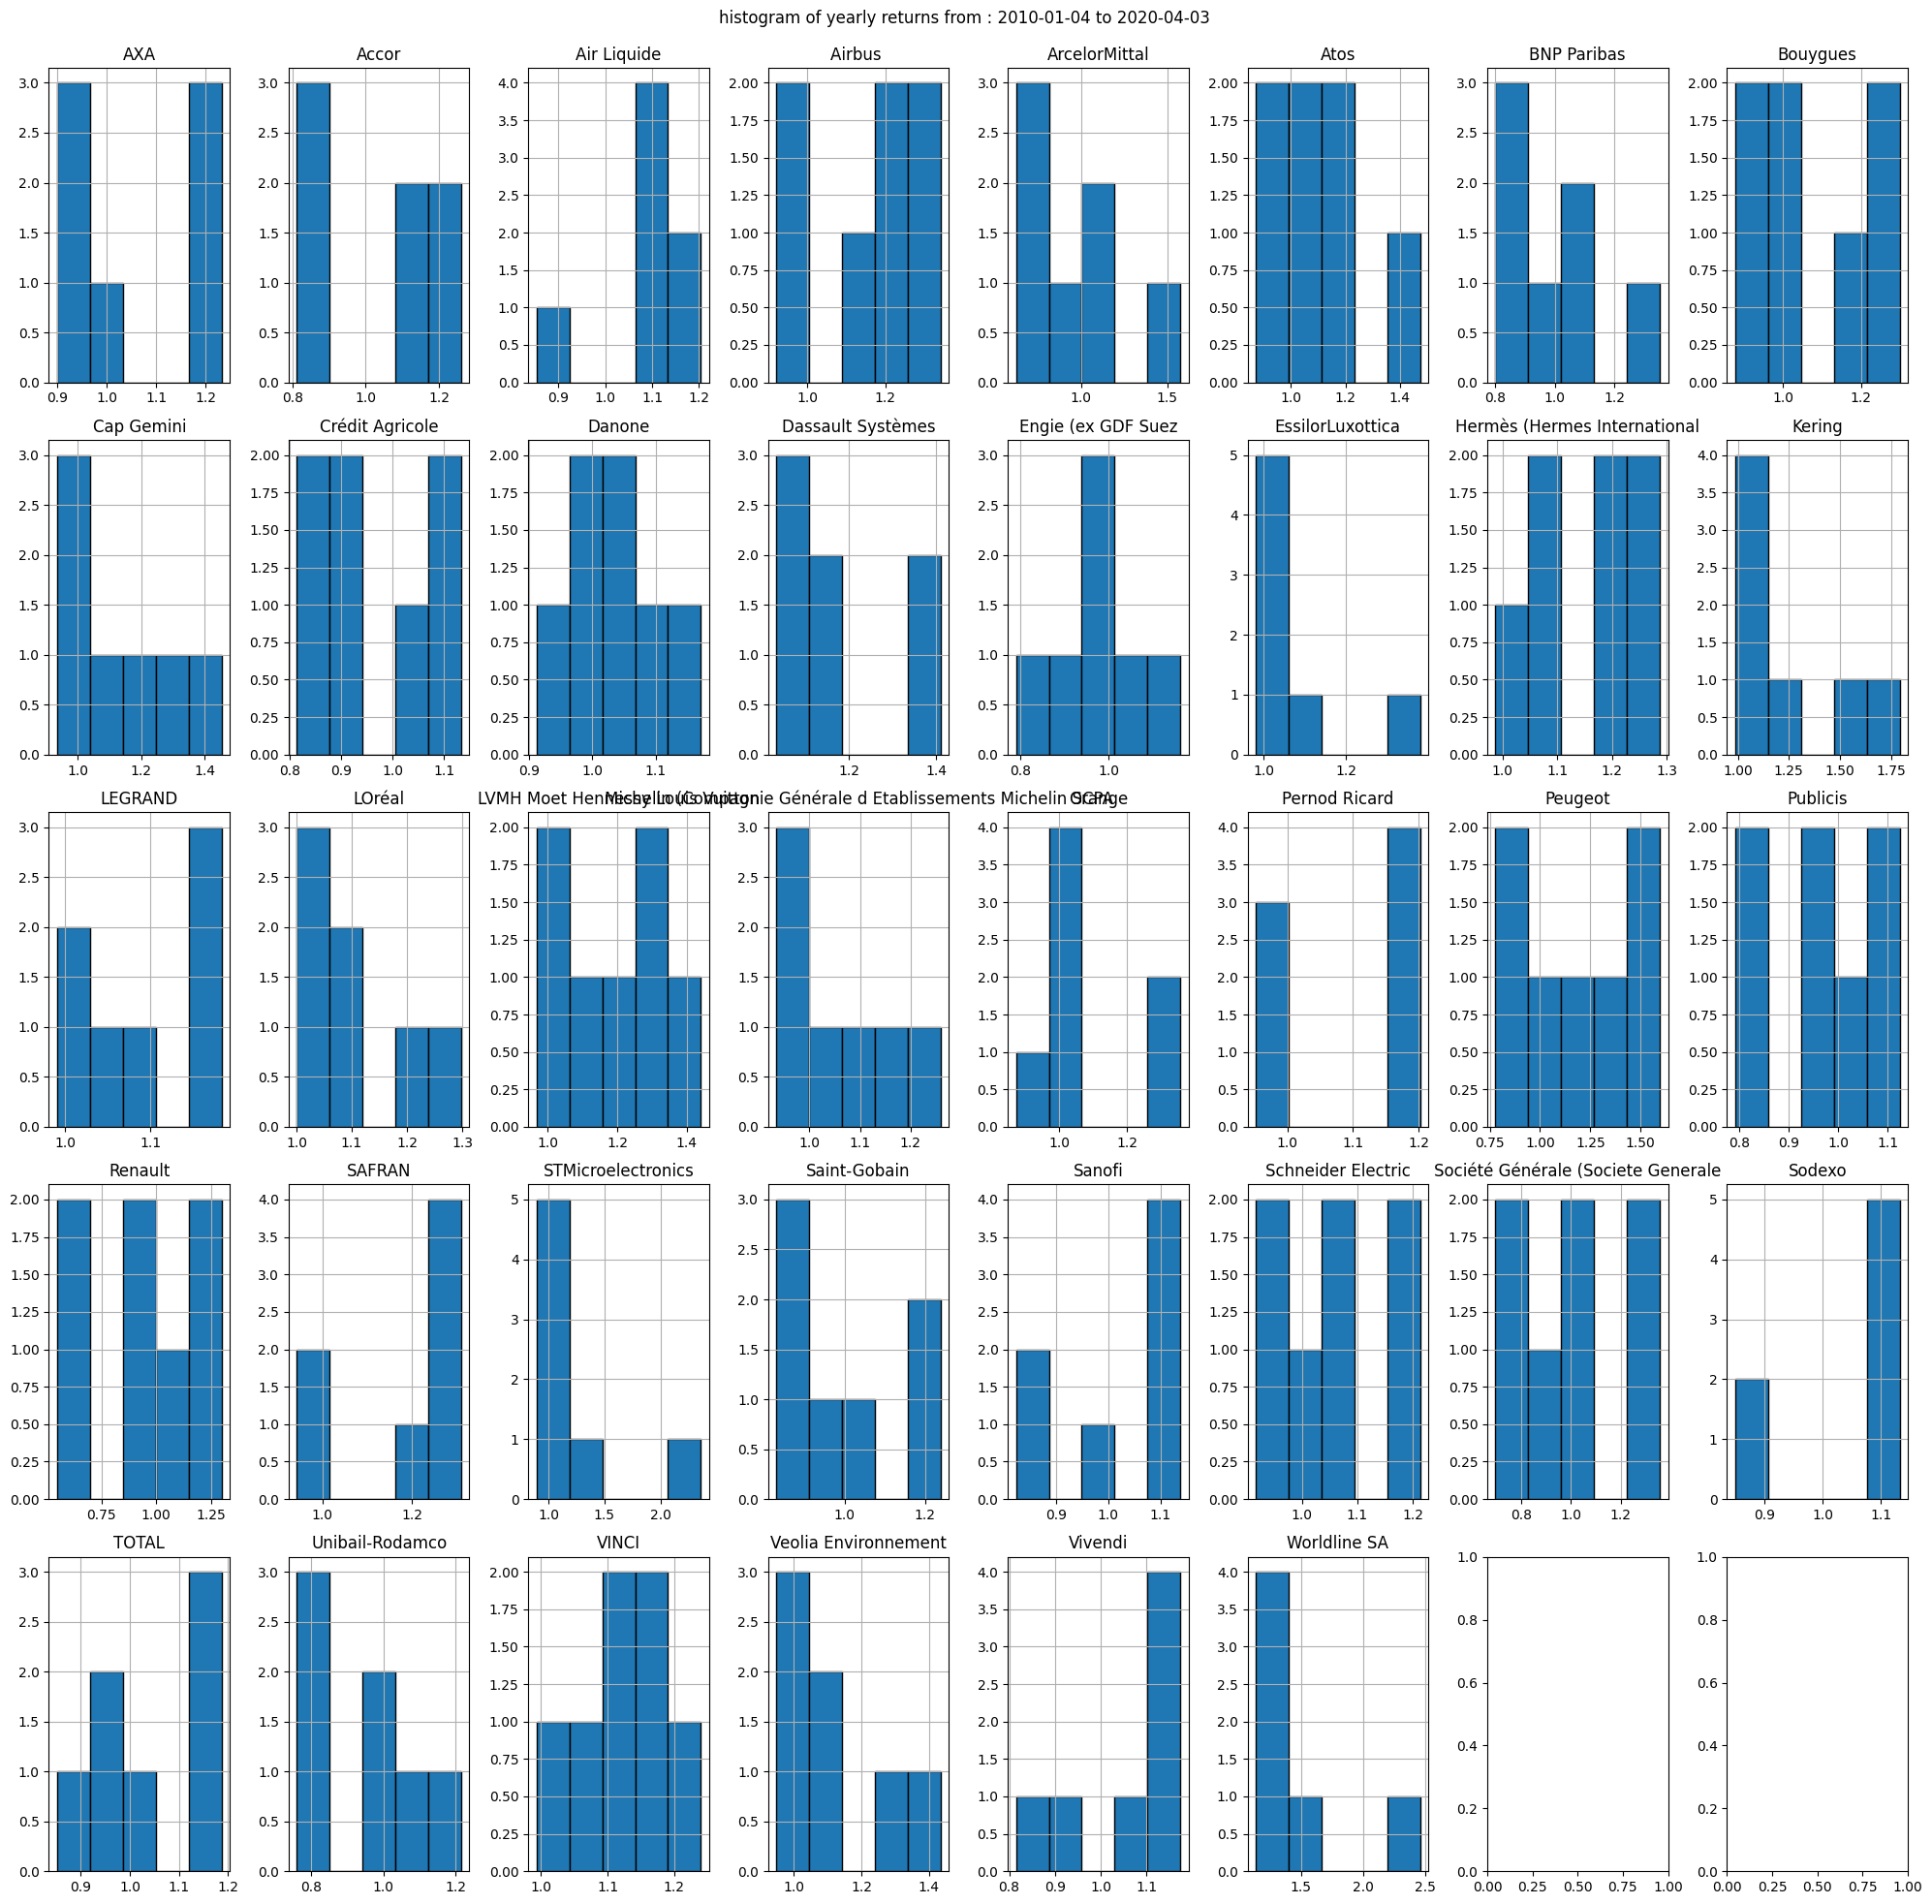

In [211]:
fig, axs = plt.subplots(5, 8, figsize=(20, 20))

for i, column in enumerate(CAC40_yearly_return.columns):
    clean_data = CAC40_yearly_return[column][np.isfinite(CAC40_yearly_return[column])]

    row = i // 8  
    col = i % 8   
    axs[row, col].hist(clean_data.dropna(), bins=5, edgecolor='black')
    axs[row, col].set_title(f'{column}')
    axs[row, col].grid(True)

plt.tight_layout()

plt.suptitle('histogram of yearly returns from : ' + start_date + ' to ' + end_date)
plt.subplots_adjust(top=0.95)

plt.show()


In [212]:
mean_returns = CAC40_yearly_return.mean()
var_returns = CAC40_yearly_return.var()

stats_rendements = pd.DataFrame({'Mean': mean_returns, 'Variance': var_returns}).T

stats_rendements

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Name,AXA,Accor,Air Liquide,Airbus,ArcelorMittal,Atos,BNP Paribas,Bouygues,Cap Gemini,Crédit Agricole,...,Sanofi,Schneider Electric,Société Générale (Societe Generale,Sodexo,TOTAL,Unibail-Rodamco,VINCI,Veolia Environnement,Vivendi,Worldline SA
Mean,1.049392,1.045731,1.085569,1.153251,0.949196,1.097799,1.001811,1.075285,1.148198,0.961645,...,1.022002,1.064278,0.999008,1.040856,1.041706,0.937423,1.124943,1.141973,1.056009,inf
Variance,0.019718,0.034280,0.012734,0.027780,0.108414,0.043375,0.035378,0.029916,0.035285,0.017843,...,0.016051,0.011435,0.056627,0.016013,0.015566,0.027909,0.006673,0.030410,0.017289,NaN


# Estimation of the parameter in the Markovotz optimzation problem $a, a_0, \lambda$

We try to evaluate the parameters using monthly values

In [213]:
mu_estimator = CAC40_monthly_return.mean().to_numpy()
omega_estimator = CAC40_monthly_return.cov().to_numpy()

In [214]:
CAC40.head()

Name,Date,AXA,Accor,Air Liquide,Airbus,ArcelorMittal,Atos,BNP Paribas,Bouygues,Cap Gemini,...,Sanofi,Schneider Electric,Société Générale (Societe Generale,Sodexo,TOTAL,Unibail-Rodamco,VINCI,Veolia Environnement,Vivendi,Worldline SA
0,2010-01-04,16.88,24.92,52.27,14.02,72.71,22.53,57.30,34.82,33.03,...,56.90,40.91,45.60,39.09,36.32,152.00,39.70,22.24,21.34,0.0
1,2010-01-05,17.14,24.82,51.86,13.92,72.62,23.11,57.37,35.21,33.51,...,55.96,41.12,45.54,39.51,36.35,153.95,40.26,22.36,21.34,0.0
2,2010-01-06,17.29,24.66,51.34,14.07,72.64,24.04,57.45,35.83,34.34,...,55.55,40.72,45.54,41.89,36.38,154.15,40.55,22.74,21.22,0.0
3,2010-01-07,17.09,24.27,51.34,14.24,73.28,23.96,58.50,35.92,34.16,...,56.08,40.40,46.59,41.32,36.49,155.20,40.82,23.01,21.17,0.0
4,2010-01-08,17.17,24.43,51.52,14.38,74.24,24.12,59.75,35.71,34.19,...,55.79,40.06,47.72,41.47,36.31,153.85,41.35,24.02,20.80,0.0


In [215]:
CAC40.set_index('Date', inplace=True)

In [216]:
r = 0.02 # risk free rate 
v = 1000 # initial wealth

sigma = 1 # risk aversion coefficient

price_2015=  CAC40.loc['2015-01-02'] # first business date of 2015
diagp_0 = np.diag(price_2015)

prices_2016 = CAC40.loc['2015-12-30'] # first business date of 2016
diagp_1 = np.diag(prices_2016)

In [217]:
def markovitz_solution(r, v, sigma, mu, omega, diagp_0):
    n = len(diagp_0)
    e = np.ones(n)

    mu_tilde = mu - (1+r) * e

    lamda = 1/sigma * np.sqrt(mu_tilde.T @ np.linalg.inv(omega) @ mu_tilde)
    a = (1/lamda) * np.linalg.inv(diagp_0) @ np.linalg.inv(omega) @ mu_tilde
    a_0 = v - (1/lamda) * mu_tilde.T @ np.linalg.inv(omega) @ e

    return a_0, a, lamda

In [218]:
def markovitz_portfolio(r, v, sigma, mu, omega, diagp_0, diagp_1): 

    a0, a, lamda = markovitz_solution(r, v, sigma, mu, omega, diagp_0)
    
    ptf0 = a0 + a.T @ diagp_0.diagonal()
    ptf1 = a0 + a.T @ diagp_1.diagonal()

    return 100*(ptf1-ptf0)/ptf0, ptf1, ptf0



## Property of an efficient portfolio with a riskless asset 

For an efficient portfolio, we have : 
$$\mathbb{E}[V_1] = a_0 (1+r) + a^T diag(p_0) \mu = v(1+r) - \frac{1}{\lambda} (1+r)\tilde{\mu} \Omega^{-1} e + \frac{1}{\lambda} \tilde{\mu} \Omega^{-1} \mu$$
$$= v(1+r) +\frac{1}{\lambda} \tilde{\mu} \Omega^{-1} \tilde{\mu}$$

But as : 
$$\sqrt{Var(V_1)} = \sigma = \frac{1}{\lambda} \left( \tilde{\mu}^T \Omega^{-1} \tilde{\mu} \right)^{\frac{1}{2}}$$ 

Finally, by parameting with $\lambda$ we have : 
$$\mathbb{E}[V_1](\lambda) = v(1+r) + \sqrt{Var(V_1)} \left( \tilde{\mu}^T \Omega^{-1} \tilde{\mu} \right)^{\frac{1}{2}}$$

In the plan (Stadard Deviation, Espectation) the efficient frontier is a straight line. We then remark that every efficient portfolio can be writeen as follow : 

$$P = \alpha_0 (\lambda) p_0 + \alpha^*(\lambda) p^{*}$$
$$\text{where} \quad p_0 = FRA \quad , \quad p^* = diag(p_0)^{-1} \Omega^{-1} \tilde{\mu} \quad , \quad \alpha_0(\lambda) = \frac{1}{\lambda} diag(p_0)^{-1} \Omega^{-1} \tilde{\mu} \quad , \quad \alpha^{*} = \frac{1}{\lambda} diag(p_0)^{-1} \Omega^{-1} \tilde{\mu}$$




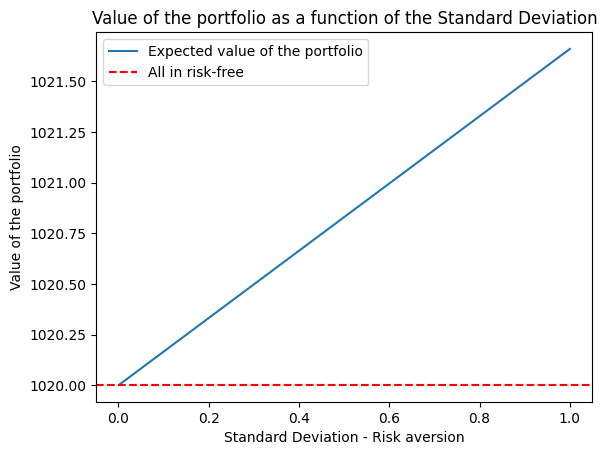

In [219]:
standard_deviation_list = np.linspace(0.001, 1, 100)


espectation_portfolio_list = []
profit = []


for sigma in standard_deviation_list:
    a0, a, lamda = markovitz_solution(r, v, sigma, mu_estimator, omega_estimator, diagp_0)

    espectation_V = a0*(1+r) + a.T @ diagp_0 @ mu_estimator
    espectation_portfolio_list.append(espectation_V)

    ptf_profit, ptf1, ptf0 = markovitz_portfolio(r, v, sigma, mu_estimator, omega_estimator, diagp_0, diagp_1)

non_risk = v*(1+r)

plt.plot(standard_deviation_list, espectation_portfolio_list, label='Expected value of the portfolio')   
plt.axhline(y=non_risk, color='r', label='All in risk-free', linestyle='--')
plt.xlabel('Standard Deviation - Risk aversion')
plt.ylabel('Value of the portfolio')
plt.title('Value of the portfolio as a function of the Standard Deviation')
plt.legend()
plt.show()

## Property of an efficient portfolio without a riskless asset 

Here we assume there are no riskless asset and that we are obliged to invest in risky asset. The problem is slightly different and can be written as follows : 


then : $$V_0 = a^T p_0 = v$$
$$V_1 = \sum_{i=1}^{N} a_i p_{i,0}y_i = a^Tdiag(p_0)Y$$

We then, in the Markowits framework, want to maximize the expected value $\mathbb{E}[V]$ of the portfolio with respect to a certain constraint in the variance $Var(V) = \sigma^2$. 

We the search the portfolio that verify the following optimization problem (classical Markovitz optimization problem): 

$$\max_{w_a} \mathbb{E}[V_1] = \max_{w_a} w_a^T \mu $$

w.r.t the constraints:

$$ w_a^T \Omega w_a = \sigma^2, \quad \text{and} \quad w_a^T e = v$$
We call efficient frontier all the portfolio that verify those contraints. 

Now let's work on those equations to rewrite them in a way we can resolve it. So we have : 


To solve this optimzation problem, we search the stationnary points of the following Lagrangin $\alpha (w_a, \lambda)$ function :

$$\alpha(w_a, \lambda, \delta) = w_a^T \tilde{\mu} - \frac{\lambda}{2} (w_a^T \Omega w_a - \sigma^2) - \delta (w_a^T e - v)$$

$$\alpha(w_a, \lambda, \delta) =  \sum_{i=1}^{N} w_{a, i} \tilde{\mu}_i - \frac{\lambda}{2} \left(\sum_{i=1}^{N} w_{a, i}^2 \Omega_{i,i} + \sum_{i \not= j} w_{a, i} w_{a, j} \Omega_{i,j} - \sigma^2 \right) - \delta \left(\sum_{i=1}^{N} w_a,i - v\right)$$


The first order conditions are : 


$$\quad \frac{\partial\mathcal{\alpha}}{\partial w_{a,i}} = \tilde{\mu_i} - \lambda \left( w_{a,i} \Omega_{i,i} + \sum_{j\not= i} w_{a,j}\Omega_{i,j} \right) - \delta w_{a,i} = 0 $$

$$\frac{\partial\mathcal{\alpha}}{\partial \lambda} = -\frac{1}{2} \left( w_a^T \Omega w_a- \sigma^2 \right) = 0 $$

$$\frac{\partial\mathcal{\alpha}}{\partial \delta} = w_a^T e - v = 0 $$

Hence 
$$\tilde{\mu} =  \lambda \Omega w_a + \delta e \quad \text{and} \quad w_a^T \Omega w_a = \sigma^2 \quad \text{and} \quad w_a^T e = v$$

We first compute $w_a$ to find a quadratic equation over $\delta$ : 
$$w_a = \frac{1}{\lambda} \Omega^{-1} \mu - \frac{\delta}{\lambda} \Omega^{-1} e$$

Then : 
$$ \lambda v = \mu^T\Omega^{-1}e - \delta e^T\Omega^{-1}e$$

and

$$ \sigma^2 = \left ( \frac{1}{\lambda}\mu^T\Omega^{-1} - \frac{\delta}{\lambda}e^T\Omega^{-1} \right) \Omega \left ( \frac{1}{\lambda}\Omega^{-1}\mu - \frac{\delta}{\lambda} \Omega^{-1}e \right)$$

$$\lambda \sigma^2 = \left(\mu^T-\delta e^T\right) \left(\Omega^{-1}\mu - \delta \Omega^{-1}e \right)$$

$$ \lambda v = \mu^T\Omega^{-1}e - \delta e^T\Omega^{-1}e$$ 

We now inject $\lambda$ from the second equation in the first one and then by isolatin $\delta$ we have the following relationship : 

$$\delta^2 \left(e^T\Omega^{-1}e -(\frac{\sigma}{v})^2 (e^T\Omega^{-1} e)^2\right) - \delta \left( \mu^T\Omega^{-1}e + e^T\Omega^{-1}\mu - 2 (\frac{\sigma}{v})^2(\mu^T\Omega^{-1}e)(e^T\Omega^{-1}e)        \right) + \mu^T\Omega^{-1}\mu - (\frac{\sigma}{v}^2) (\mu^T \Omega^{-1} e)^2 = 0$$

As it is a quadratic equation, there are two possible solution but only one will be possible ! 

For the next code, we can rewrite this equation as follow : 


$$a_2 \delta^2 +a_1 \delta + a_0 = 0$$


In [220]:
def solve_markowitz_no_riskless(v, sigma, mu, omega, diagp_0):
    n = len(mu)
    e = np.ones(n)


    a0 = mu.T @ np.linalg.inv(omega) @ mu - sigma**2/v**2 * (mu.T @ np.linalg.inv(omega) @ e)**2
    a1 = -mu.T @ np.linalg.inv(omega) @ e - e.T @ np.linalg.inv(omega) @ mu + 2*sigma**2/v**2 \
        * mu.T @ np.linalg.inv(omega) @ e * e.T @ np.linalg.inv(omega) @ e
    a2 = e.T @ np.linalg.inv(omega) @ e - sigma**2/v**2 * (e.T @ np.linalg.inv(omega) @ e)**2

    Delta_trinome = a1**2 - 4*a0*a2
    #print(delta)
    delta_0= (-a1 - np.sqrt(Delta_trinome))/(2*a2)
    delta_1 = (-a1 + np.sqrt(Delta_trinome))/(2*a2)

    lamda_1 = 1/v * (mu.T @ np.linalg.inv(omega) @ e - delta_0 * e.T @ np.linalg.inv(omega) @ e)
    lamda_2 = 1/v * (mu.T @ np.linalg.inv(omega) @ e - delta_1 * e.T @ np.linalg.inv(omega) @ e)

    wa = 1/lamda_1 * np.linalg.inv(omega) @ mu - delta_0/lamda_1 * np.linalg.inv(omega) @ e	
    wb = 1/lamda_2 * np.linalg.inv(omega) @ mu - delta_1/lamda_2 * np.linalg.inv(omega) @ e

    #print(wa.T @ e)
    
    aa = np.linalg.inv(diagp_0) @ wa
    ab = np.linalg.inv(diagp_0) @ wb

    return aa, ab

/var/folders/ly/ylvnx_l518x5nbt0ssvchqww0000gn/T/ipykernel_61917/1343890845.py:13: RuntimeWarning: invalid value encountered in sqrt
  delta_0= (-a1 - np.sqrt(Delta_trinome))/(2*a2)
/var/folders/ly/ylvnx_l518x5nbt0ssvchqww0000gn/T/ipykernel_61917/1343890845.py:14: RuntimeWarning: invalid value encountered in sqrt
  delta_1 = (-a1 + np.sqrt(Delta_trinome))/(2*a2)


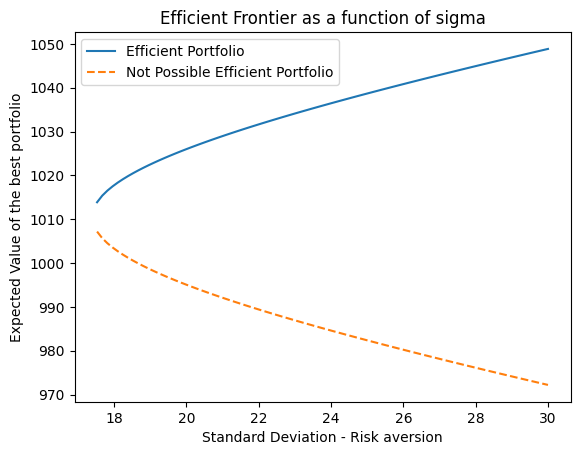

In [221]:
sigma_list = np.linspace(15.8113884, 30, 100)

esp_V_list_a = []
esp_V_list_b = []

for sigma in sigma_list:
    aa, bb = solve_markowitz_no_riskless(v, sigma, mu_estimator, omega_estimator, diagp_0)
    esp_V_a = aa.T @ diagp_0 @ mu_estimator
    esp_V_b = bb.T @ diagp_0 @ mu_estimator

    #print(aa.T @ diagp0 @ np.ones(len(mu_test)))

    esp_V_list_a.append(esp_V_a)
    esp_V_list_b.append(esp_V_b)
    
plt.plot(sigma_list, esp_V_list_b, label='Efficient Portfolio')
plt.plot(sigma_list, esp_V_list_a, linestyle='--', label='Not Possible Efficient Portfolio')
plt.legend()
plt.xlabel('Standard Deviation - Risk aversion')
plt.ylabel('Expected Value of the best portfolio')
plt.title('Efficient Frontier as a function of sigma')
plt.show()


We observe a semi-parabola, and we also find that if $\sigma$ is too small (i.e., the investor desires very low risk), there is no solution to the Markowitz Portfolio Optimization Problem. This is because the intrinsic risks of the risky assets are not zero, and there is no risk-free asset to offset this risk. When smooth values for $\mu$ and $\Omega$ are used, the numerical implementation performs correctly.

However, when using the empirical covariance matrix, $\Omega^{-1}$ tends to have values on the order of 10**16, making the numerical implementation highly unstable.

An alternative estimator might be needed to make the Markowitz Portfolio Optimization work effectively on real data.

Nevertheless, all theoretical computations are validated when smooth values are applied.